In [661]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw as imd

im = cv.imread(r'C:\Users\user\Downloads\combine.png')

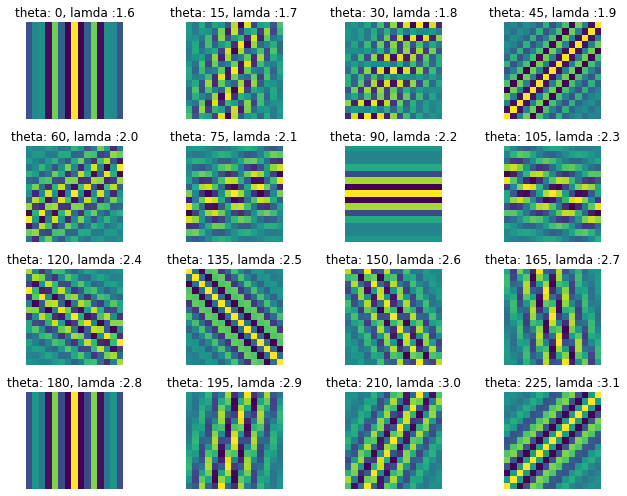

In [662]:
def kernel_builder():
           
    #thetas =np.full(16,np.pi)
    thetas=np.arange(0, 5*np.pi/4, np.pi/12)
    #lamdas =np.full(16,3.2)
    lamdas = np.linspace(np.pi/2, np.pi, 16)
    
    f,ax =plt.subplots(4,4, figsize=(9,7))
    
    kernels =[]
      
    for lamda,theta,axs in zip(lamdas,thetas, ax.flatten()):
        kern = cv.getGaborKernel((15,15), sigma=4.0, theta=theta, lambd=lamda,psi=0,gamma=0.01, ktype=cv.CV_32F)
        kernels.append(kern)
               
        axs.imshow(kern)
        axs.set_title('theta: {:.0f}, lamda :{:.1f}'.format(theta*180/np.pi,lamda))
        axs.axis('off')

    plt.tight_layout()
    return f,kernels,thetas,lamdas
sheet, kernels,thetas,lamdas = kernel_builder()
#sheet.savefig(fname =r'C:\Users\user\Documents\kernels_circle_lamda_var.png',format= 'png')


### As size of kernel increases the band filters restrict more features from the image to pass through it. For lower values of kernel the filters are linient to image features

#### Increasing the value of wavelength parameter lamda smoothens the pixel values further away from the pixel

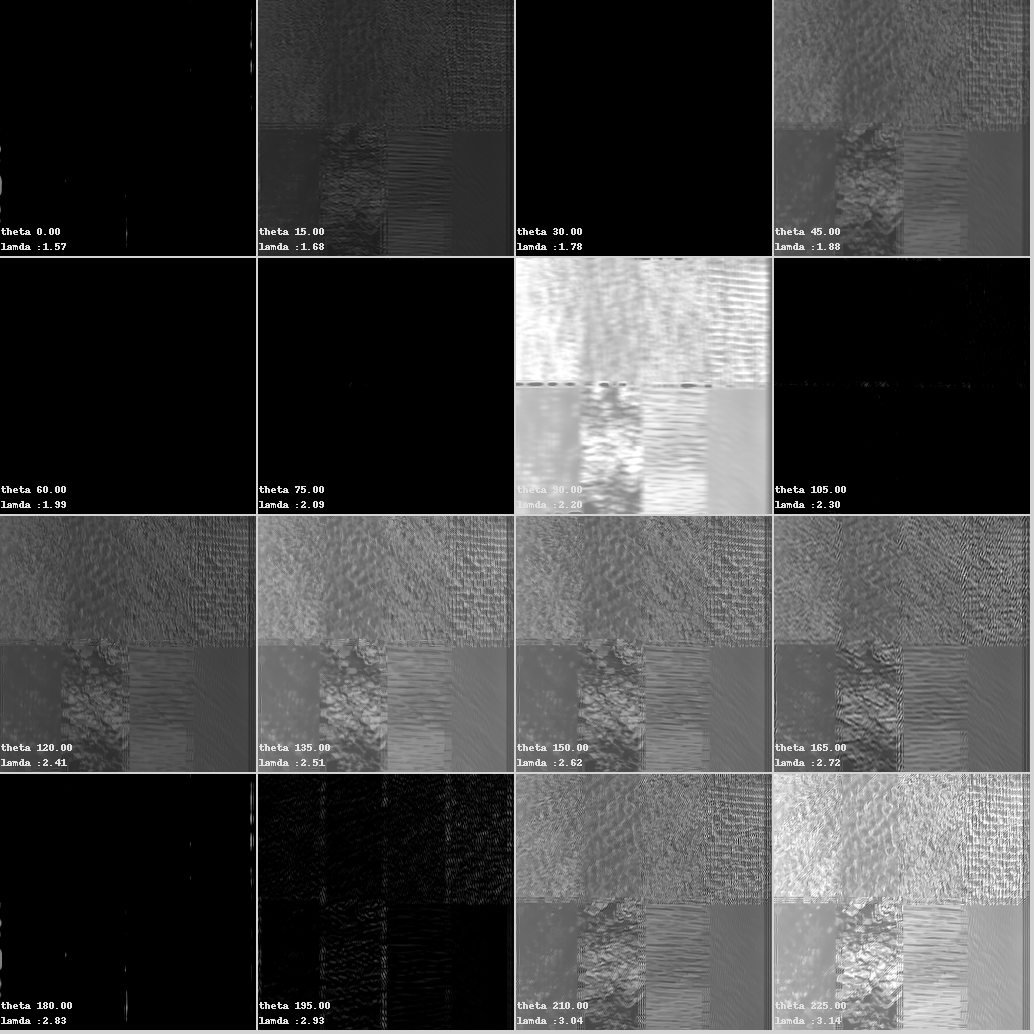

In [664]:
def compare_kernels(im,kernels,thetas=0,lamdas=0):
    
    from PIL import ImageDraw as imd
    from PIL import Image
    gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
    dst = cv.fastNlMeansDenoising(gray,None,10,7,21)
    filtered_im = []
    canvas = Image.new('L', (256*4+10,256*4+10),'lightgray')
    x,y =0,0
    
    for kernel,teta,lamda in zip(kernels,thetas,lamdas):
        fimg = cv.filter2D(dst, cv.CV_8UC3, kernel)
        filtered_im.append(fimg)
        fimg = Image.fromarray(fimg).reduce(2)
        imd.Draw(fimg).text((1,fimg.height-30),'theta {:.2f}\nlamda :{:.2f}'.format(teta*180/np.pi,lamda), 
                            fill='yellow', stroke_width=0,stroke_fill=None)
        canvas.paste(fimg,(x,y))
        if (x+fimg.width)>1024:
            x = 0
            y = y + fimg.height + 2
            
        else: x = x + fimg.width + 2
        
    return canvas, filtered_im
cvas,filts = compare_kernels(im,kernels,thetas,lamdas)
#cvas.save(r'C:\Users\user\Documents\filter_elipse_lamda_var.png',format='png')
cvas

In [647]:
def apply_Gabor(im,k=7,theta=0,lamda=0,gama=1):
    
    from PIL import ImageDraw as imd
    from PIL import Image
    
    
    theta=theta*np.pi/180
    
    kern = cv.getGaborKernel((k,k), sigma=4.0, theta=theta, lambd=lamda,psi=0,gamma=gama, ktype=cv.CV_32F)
    gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
    dst = cv.fastNlMeansDenoising(gray,None,10,7,21)
    fimg = cv.filter2D(dst, cv.CV_8UC3, kern)
    fimg = Image.fromarray(fimg).reduce(2)
    imd.Draw(fimg).text((1,fimg.height-40),'theta {:.2f}\nlamda :{:.2f}\nkernel :{} ellipse'.format(theta*180/np.pi,lamda,k),
                        fill='yellow', stroke_width=1,stroke_fill='gray')
    #fimg.save(r'C:\Users\user\Documents\combine_filtered.png',format='png')
    return fimg

In [660]:
img = apply_Gabor(im,k=3,theta=135,lamda=2.9,gama=0.01)
img.save(r'C:\Users\user\Documents\combine_filtered_kernel_3.png',format='png')